In [1]:
import cv2
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
from skimage import data
from sklearn.cluster import KMeans
import math

test_path = '/kaggle/input/agrupa-las-cartas/test'
test_data = []
train_path = '/kaggle/input/agrupa-las-cartas/test'
train_data = []
i = 0;
for filename in os.listdir(test_path):
    
    img = cv2.imread(f"{test_path}/{filename}", cv2.IMREAD_COLOR)
    
    # convert to gray image
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Split color channels
    
    #if(i == 12):
    (BlueImg, GreenImg, RedImg) = cv2.split(img)
    
    '''
    plt.imshow(BlueImg)
    plt.show()
    plt.imshow(GreenImg)
    plt.show()
    plt.imshow(RedImg)
    plt.show()
    '''
    
        
        
    # blur image
    gaussin_blur_img = cv2.GaussianBlur(GreenImg, (5,5), 5)
    bilateral_blur_img = cv2.bilateralFilter(gaussin_blur_img, 9, 75, 75)
    
    # contours_img = cv2.findContours(bilateral_blur_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # ERROR return tuple of points of the vector, not img
    
    # resize image
    # dim = (50, 43)
    # resized_img = cv2.resize(bilateral_blur_img, dim, interpolation = cv2.INTER_AREA)

    test_data.append(bilateral_blur_img)
    i=i+1
    

for filename in os.listdir(train_path):
    img = cv2.imread(f"{train_path}/{filename}", cv2.IMREAD_COLOR)
    
    # convert to gray image
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # blur image
    gaussin_blur_img = cv2.GaussianBlur(gray_img, (5,5), 5)
    bilateral_blur_img = cv2.bilateralFilter(gaussin_blur_img, 9, 75, 75)
    
    # contours_img = cv2.findContours(bilateral_blur_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # ERROR return tuple of points of the vector, not img
    
    # resize image
    dim = (50, 43)
    resized_img = cv2.resize(bilateral_blur_img, dim, interpolation = cv2.INTER_AREA)

    train_data.append(resized_img)


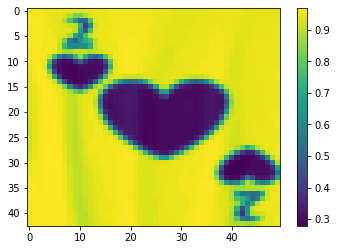

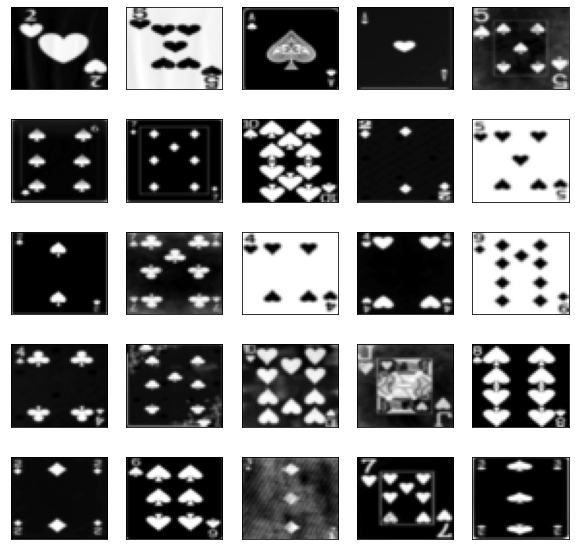

In [2]:
# NORMALIZAR LOS DATOS (pasar de 0-255 a 0-1)

for index in range(len(test_data)):
    test_data[index] = test_data[index] / 255.0
    
for index in range(len(train_data)):
    train_data[index] = train_data[index] / 255.0

#MOSTRAR 
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()
#contours = cv2.findContours(resized_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(train_data[0], contours, -1, (0,255.0), 3)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
plt.show()

In [3]:
train_data_array = np.array(train_data)
test_data_array = np.array(test_data)

from sklearn.decomposition import PCA

test_array2d_2 = test_data_array.reshape(len(test_data_array), len(test_data_array[0]) * len(test_data_array[0][0]))


pca = PCA(n_components = 5)
test_array2d = pca.fit_transform(test_array2d_2)

# train_array2d = train_data_array.reshape(len(train_data_array), len(train_data_array[0]) * len(train_data_array[0][0]))

print("hola")

hola


<AxesSubplot:xlabel='x', ylabel='y'>

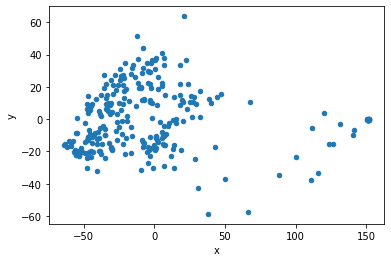

In [4]:
x = pd.DataFrame(test_array2d)
x.columns = ["x", "y", "z", "a", "b"]
x.plot.scatter(x="x", y="y")

In [5]:
from sklearn.cluster import SpectralClustering

spectral_cluster = SpectralClustering(assign_labels='discretize', n_clusters=5, random_state=42)
labels = spectral_cluster.fit_predict(test_array2d)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [6]:
labels





array([0, 2, 1, 3, 0, 0, 2, 0, 3, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       3, 1, 0, 3, 2, 1, 2, 3, 4, 0, 2, 3, 2, 0, 1, 1, 1, 3, 1, 0, 2, 0,
       2, 0, 0, 2, 3, 2, 1, 3, 0, 0, 2, 2, 3, 3, 0, 3, 0, 0, 3, 0, 2, 3,
       0, 0, 0, 3, 0, 3, 0, 0, 2, 3, 2, 3, 0, 0, 1, 0, 0, 0, 2, 0, 2, 3,
       1, 0, 0, 2, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 3, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 3, 3, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 0, 4, 0, 3, 0, 4,
       3, 3, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 3, 0, 2, 0, 2, 3, 2, 2, 3,
       2, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 3, 1, 1, 2, 0, 3, 2, 0, 1, 3, 2, 2, 3, 0, 3, 1, 0, 2, 3, 3,
       0, 3, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2, 0, 2, 1, 1, 0, 1, 3, 0, 0, 0,
       3])

In [7]:
num_id = []
for filename in os.listdir(test_path):
    punto = filename.index('.')
    cadena = filename[0:punto]
    num_id.append(int(cadena))

ids = pd.DataFrame(num_id)
clusters = pd.DataFrame(labels)
clusters = clusters.astype(str)
print(ids)
print(len(ids))

print(clusters)
print(len(clusters))


solucion = ids.join(clusters, how='left', lsuffix='id', rsuffix='suit')
solucion.columns = ['id', 'suit']
print("csv:")
print(solucion)
solucion.to_csv('fichero1.csv', index=False) 

        0
0    3863
1    2021
2    7706
3    7512
4    6203
..    ...
260  5414
261  7836
262  5972
263   605
264  7138

[265 rows x 1 columns]
265
     0
0    0
1    2
2    1
3    3
4    0
..  ..
260  3
261  0
262  0
263  0
264  3

[265 rows x 1 columns]
265
csv:
       id suit
0    3863    0
1    2021    2
2    7706    1
3    7512    3
4    6203    0
..    ...  ...
260  5414    3
261  7836    0
262  5972    0
263   605    0
264  7138    3

[265 rows x 2 columns]


In [8]:
from sklearn.metrics.cluster import adjusted_rand_score

clusters_correctos = [1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 3, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 3, 0, 1, 2, 0, 1, 3, 1, 2, 0, 0, 3, 0, 0, 4, 0, 0, 1, 2, 1, 4, 1, 0, 0, 3, 1, 3, 0, 1, 2, 2, 3, 2, 2, 0, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 2, 0, 2, 1, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 2, 3, 1, 2, 3, 0, 0, 1, 0, 0, 3, 0, 1, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 1, 0, 2, 3, 2, 0, 3, 1, 2, 2, 2, 3, 3, 0, 1, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, 3, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 1, 3, 0, 1, 3, 1, 3, 0, 0, 4, 3, 0, 0, 0, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 2, 0, 1, 2, 2, 0, 3, 3, 3, 2, 1, 1, 0, 3, 0, 1, 1, 0, 1, 3, 1, 0, 2, 0, 3, 3, 1, 3, 4, 3, 0, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 2, 3, 3, 3, 4, 2, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 3, 0, 3, 1, 1, 2, 3, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 3, 2, 0, 3, 3, 3, 1, 3, 3, 2, 2, 0]

ari = adjusted_rand_score(clusters_correctos, labels)
print("Ari : " + str(ari))

print(clusters_correctos)
labels

Ari : 0.0005566441892085246
[1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 3, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 3, 0, 1, 2, 0, 1, 3, 1, 2, 0, 0, 3, 0, 0, 4, 0, 0, 1, 2, 1, 4, 1, 0, 0, 3, 1, 3, 0, 1, 2, 2, 3, 2, 2, 0, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 2, 0, 2, 1, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 2, 3, 1, 2, 3, 0, 0, 1, 0, 0, 3, 0, 1, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 1, 0, 2, 3, 2, 0, 3, 1, 2, 2, 2, 3, 3, 0, 1, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, 3, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 1, 3, 0, 1, 3, 1, 3, 0, 0, 4, 3, 0, 0, 0, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 2, 0, 1, 2, 2, 0, 3, 3, 3, 2, 1, 1, 0, 3, 0, 1, 1, 0, 1, 3, 1, 0, 2, 0, 3, 3, 1, 3, 4, 3, 0, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 2, 3, 3, 3, 4, 2, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 3, 0, 3, 1, 1, 2, 3, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 3, 2, 0, 3, 3, 3, 1, 3, 3, 2, 2, 0]


array([0, 2, 1, 3, 0, 0, 2, 0, 3, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       3, 1, 0, 3, 2, 1, 2, 3, 4, 0, 2, 3, 2, 0, 1, 1, 1, 3, 1, 0, 2, 0,
       2, 0, 0, 2, 3, 2, 1, 3, 0, 0, 2, 2, 3, 3, 0, 3, 0, 0, 3, 0, 2, 3,
       0, 0, 0, 3, 0, 3, 0, 0, 2, 3, 2, 3, 0, 0, 1, 0, 0, 0, 2, 0, 2, 3,
       1, 0, 0, 2, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 3, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 3, 3, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 0, 4, 0, 3, 0, 4,
       3, 3, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 3, 0, 2, 0, 2, 3, 2, 2, 3,
       2, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 3, 1, 1, 2, 0, 3, 2, 0, 1, 3, 2, 2, 3, 0, 3, 1, 0, 2, 3, 3,
       0, 3, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2, 0, 2, 1, 1, 0, 1, 3, 0, 0, 0,
       3])

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

for i in np.arange(0.1, 2.0, 0.1):
    spectral_cluster = SpectralClustering(assign_labels='discretize', n_clusters=5, random_state=42, n_init = 100, gamma = i)
    labels = spectral_cluster.fit_predict(test_array2d)

    clusters_correctos = [1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 3, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 3, 0, 1, 2, 0, 1, 3, 1, 2, 0, 0, 3, 0, 0, 4, 0, 0, 1, 2, 1, 4, 1, 0, 0, 3, 1, 3, 0, 1, 2, 2, 3, 2, 2, 0, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 2, 0, 2, 1, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 2, 3, 1, 2, 3, 0, 0, 1, 0, 0, 3, 0, 1, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 1, 0, 2, 3, 2, 0, 3, 1, 2, 2, 2, 3, 3, 0, 1, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, 3, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 1, 3, 0, 1, 3, 1, 3, 0, 0, 4, 3, 0, 0, 0, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 2, 0, 1, 2, 2, 0, 3, 3, 3, 2, 1, 1, 0, 3, 0, 1, 1, 0, 1, 3, 1, 0, 2, 0, 3, 3, 1, 3, 4, 3, 0, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 2, 3, 3, 3, 4, 2, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 3, 0, 3, 1, 1, 2, 3, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 3, 2, 0, 3, 3, 3, 1, 3, 3, 2, 2, 0]

    ari = adjusted_rand_score(clusters_correctos, labels)
    print("Gamma: " + str(i) + " -> Ari : " + str(ari) + "\n")

Gamma: 0.1 -> Ari : 0.003531703433182107

Gamma: 0.2 -> Ari : -0.002562240853542872

Gamma: 0.30000000000000004 -> Ari : 0.0018455250283095407

Gamma: 0.4 -> Ari : -0.0037529041479231516



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 0.5 -> Ari : -0.004297259478328211



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 0.6 -> Ari : -0.00310012282880811



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 0.7000000000000001 -> Ari : -0.0037772978291344636



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 0.8 -> Ari : 0.0017214067339467228



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 0.9 -> Ari : 0.0032341229657818823



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 1.0 -> Ari : 0.0005566441892085246



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 1.1 -> Ari : -0.0035176297524479026



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 1.2000000000000002 -> Ari : 0.005962272228205145



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 1.3000000000000003 -> Ari : -0.0007846819020289467

Gamma: 1.4000000000000001 -> Ari : -0.003183349770412492



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Gamma: 1.5000000000000002 -> Ari : 0.0042473232847677215



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:100: RuntimeWarning: divide by zero encountered in true_divide
  vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
SVD did not converge, randomizing and trying again
Gamma: 1.6 -> Ari : 0.0

Gamma: 1.7000000000000002 -> Ari : 0.0032363915838281077

Gamma: 1.8000000000000003 -> Ari : 0.0006354484874263692

Gamma: 1.9000000000000001 -> Ari : 0.011015788630808106



/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
